<a href="https://colab.research.google.com/github/VasylDvorakDS/Probability_and_statistics_theory/blob/master/Probability_theory_Home_Work_Lesson_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Задача 1**

1.	Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks): zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110], ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]. Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная). Произвести расчет как с использованием intercept, так и без.


In [469]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [470]:
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])
x=zp
y=ks
nx=len(x)
ny=len(y)


Напишем функцию для построения scatter plot и линии регресси с помощь библиотеки.

In [471]:
def scatter_lin_reg(x_g, y_g):
  sns.regplot(x=x_g, y=y_g, scatter=True, fit_reg=True, ci=None, line_kws={"color":"red"})
  plt.xlabel('Зарплата заёмщиков')
  plt.ylabel('Значения поведенческого кредитного скоринга', rotation =90)
  plt.show();

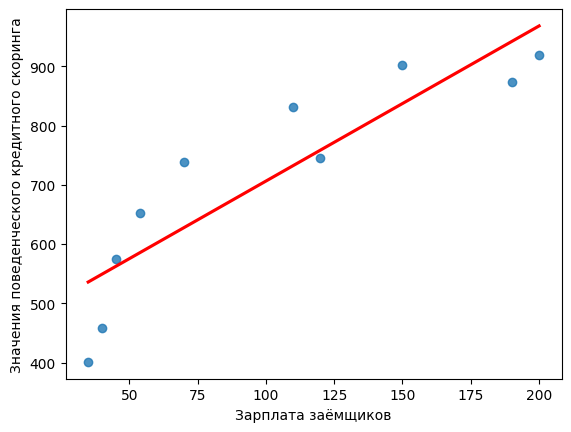

In [472]:
scatter_lin_reg(x_g=x, y_g=y)

Решаем задачу матричным методом.

Сначала решаем задачу без intercept

In [473]:
x_r = x.reshape((nx,1))
x_r

array([[ 35],
       [ 45],
       [190],
       [200],
       [ 40],
       [ 70],
       [ 54],
       [150],
       [120],
       [110]])

In [474]:
y_r = y.reshape((ny,1))
y_r

array([[401],
       [574],
       [874],
       [919],
       [459],
       [739],
       [653],
       [902],
       [746],
       [832]])

Напишем функцию для расчёта коэффициентов линейной регрессии матричным методом.

In [475]:
def coef_linear_regression_matrix(X, Y):
  return np.dot(np.linalg.inv(np.dot(X.T,X)), X.T @ Y)

In [476]:
B=coef_linear_regression_matrix(X=x_r,Y=y_r)
b1=B[0][0]
b1_non_inters=b1
b1

5.889820420132688

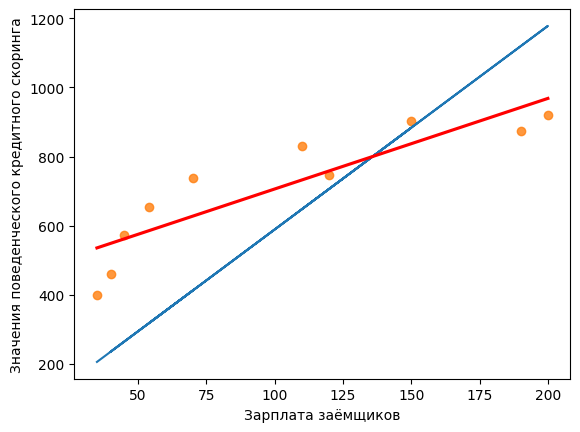

In [477]:
plt.plot(x, b1*x)
scatter_lin_reg(x_g=x, y_g=y)


Синия линия расчётной регрессии без интерсептера сильно отличается от библиотечной.

Решим задачу с interceptor.

In [478]:
x_r_inter=np.hstack([np.ones((nx,1)), x_r])
B=coef_linear_regression_matrix(X=x_r_inter,Y=y_r)
b0=B[0][0]
b1=B[1][0]
print(f'{b0=}; {b1=}')

b0=444.17735732435943; b1=2.620538882402764


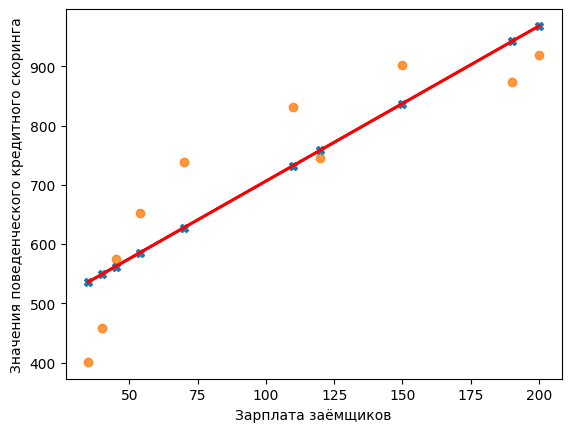

In [479]:
plt.plot(x, b0+b1*x,marker = 'X')
scatter_lin_reg(x_g=x, y_g=y)

Линия c синими маркерами расчётной регрессиии с интерсептором совпадает библиотечной.

**Задача 2**

Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept).

Нам необходимо найти коээфициент b1 функции

y=b1*y

Сначала напишем функцию средне квадратичной ошибки mse

In [480]:
def mse_b1_w(b1, x, y):
    return ((b1*x-y)**2).mean()

Напишем функцию производной mse по b1

In [481]:
def mse_b1(b1, y, x):
  return 2*((b1*x-y)*x).mean()

In [482]:
b1 = 0.1
alpha=1e-5
mse_min=mse_b1_w(b1, x, y)
for i in range(50):
  b1 -= alpha*mse_b1(b1, y, x)
  if i%10==0:
    print(f'Итерация #{i}, {b1=}, mse={mse_b1_w(b1, x, y)}')
  if mse_b1_w(b1, x, y)<=mse_min:
    mse_min=mse_b1_w(b1, x, y)
    i_min=i
    b1_min=b1
  else:
    print(f'Итерация #{i_min}, b1={b1_min}, mse={mse_min}')
    print('Достигнут минимум функци mse')
    break
print()
print(f'Окончательно коэффициент {b1=}')

Итерация #0, b1=1.6952808000000004, mse=298904.5992334053
Итерация #10, b1=5.722758921136703, mse=56901.35704574499
Итерация #20, b1=5.883166639986514, mse=56517.468344241344
Итерация #30, b1=5.889555411195862, mse=56516.859383246396
Итерация #40, b1=5.88980986526988, mse=56516.858417254174

Окончательно коэффициент b1=5.889819839868915


Коэффициент регресси b1 расчитанный матричным методом практически совпадает скоэффициентом регресси b1 расчитанным методом градиентного спуска.


**Задача 3**

Произвести вычисления как в пункте 2, но с вычислением intercept. Учесть, что изменение коэффициентов должно производиться на каждом шаге одновременно (то есть изменение одного коэффициента не должно влиять на изменение другого во время одной итерации).

Сначала напишем функцию средне квадратичной ошибки mse

In [483]:
def mse_b0b1(b0,b1, x, y):
    return (((b0+b1*x)-y)**2).mean()

Напишем функцию производной mse по b0

In [484]:
def mse_pb0(b0,b1,x,y):
    return 2*((b0+b1*x)-y).mean()

Напишем функцию производной mse по b1

In [485]:
def mse_pb1(b0,b1,x,y):
    return 2*(((b0+b1*x)-y)*x).mean()

In [486]:
b1=0.1
b0=0.1
mse_min = mse_b0b1(b0,b1, x, y)
alpha=5e-05

for i in range(700000):
  b0 -= alpha*mse_pb0(b0,b1,x,y)
  b1 -= alpha*mse_pb1(b0,b1,x,y)
  if i%50000==0:
    print(f'Итерация #{i}, {b0=}; {b1=}, mse={mse_b0b1(b0, b1, x,y)}')
  if mse_b0b1(b0, b1,x,y)<=mse_min:
    mse_min=mse_b0b1(b0, b1,x,y)
    i_min=i
    b0_min=b0
    b1_min=b1
  else:
    print(f'Итерация #{i_min}, b0={b0_min}, b1={b1_min}, mse={mse_min},\nДостигнут минимум функци mse.')
    break

print()
print(f'b0={b0_min};  nb1={b1_min}')

Итерация #0, b0=0.169966; b1=8.07468054476, mse=122318.06397097567
Итерация #50000, b0=319.27767648420047; b1=3.5398324356503275, mse=10427.569111705801
Итерация #100000, b0=409.0442373734796; b1=2.879127619051743, mse=6783.521961452364
Итерация #150000, b0=434.29473705519484; b1=2.693277491833349, mse=6495.188684804794
Итерация #200000, b0=441.3974680483413; b1=2.6409995775222037, mse=6472.374468908443
Итерация #250000, b0=443.39540029510493; b1=2.62629428586797, mse=6470.569306309746
Итерация #300000, b0=443.95740007610897; b1=2.622157823932053, mse=6470.426473787141
Итерация #350000, b0=444.1154853937451; b1=2.6209942756156086, mse=6470.415172240385
Итерация #400000, b0=444.159953325044; b1=2.6206669802831115, mse=6470.414278011555
Итерация #450000, b0=444.1724617410292; b1=2.6205749151465225, mse=6470.414207256183
Итерация #500000, b0=444.1759802422447; b1=2.6205490180788695, mse=6470.414201657699
Итерация #520164, b0=444.17653163778414, b1=2.62054495966686, mse=6470.414201349592,


Коэффициенты регресси b0, b1 расчитанные матричным методом практически совпадают скоэффициентами регресси b0, b1 расчитанными методом градиентного спуска.  